<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Demo: NN with Keras
INSTRUCTIONS:
- Run the cells
- Observe and understand the results

## Written digits classification with Keras

In [1]:
## Import libraries
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [3]:
# The digits dataset
digits = load_digits()

In [5]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

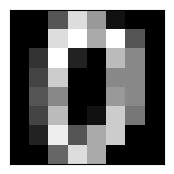

In [7]:
id = np.random.randint(len(digits.target))
id = 0
plt.figure(figsize = (2, 2))
plt.imshow(digits.images[id], cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [11]:
# Prepare input data
# input
X = digits.data.astype(np.uint8)
n_cols = X.shape[1]

# output
target = digits.target.astype(np.uint8)

# Convert the target to categorical
y = to_categorical(
    target,
    num_classes = len(set(target)))

In [13]:
n_cols

64

In [15]:
len(X)

1797

In [17]:
target

array([0, 1, 2, ..., 8, 9, 8], dtype=uint8)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 65)

In [21]:
# Set up the model architecture
model = Sequential()

In [23]:
# Add the first hidden layer
model.add(Dense(100, activation = 'relu', input_shape = (n_cols, )))
# Add the second hidden layer
model.add(Dense(50, activation = 'relu'))

# Add the output layer
model.add(Dense(10, activation = 'softmax'))

C:\Users\mdjro\anaconda3\envs\Module9\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         6,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,060 (47.11 KB)

 Trainable params: 12,060 (47.11 KB)

 Non-trainable params: 0 (0.00 B)

None


In [27]:
# Compile the model
model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [29]:
y_train.shape

(1257, 10)

In [31]:
942 / 20

47.1

In [33]:
%%time
# Fit the model
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.25,
    batch_size = 20,
    epochs = 100,
    verbose = 1)

Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4693 - loss: 2.4243 - val_accuracy: 0.2984 - val_loss: 3.9861
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7932 - loss: 0.8627 - val_accuracy: 0.9079 - val_loss: 0.3584
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9665 - loss: 0.1598 - val_accuracy: 0.8762 - val_loss: 0.3705
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9621 - loss: 0.1290 - val_accuracy: 0.9238 - val_loss: 0.2523
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9712 - loss: 0.1174 - val_accuracy: 0.7524 - val_loss: 0.8817
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9279 - loss: 0.2646 - val_accuracy: 0.9397 - val_loss: 0.2604
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9836 - loss: 0.0816 - val_accuracy: 0.9397 - val_loss: 0.2048
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9885 - loss: 0.0628 - val_accuracy: 0.9397 - v

In [34]:
dir(history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api_export_path',
 '_api_export_symbol_id',
 '_model',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params']

In [37]:
history.on_batch_begin

<bound method Callback.on_batch_begin of <keras.src.callbacks.history.History object at 0x000001C8177C5A30>>

In [39]:
#predictions = model.predict_classes(X_test)
#predictions =  (model.predict(X_test) > 0.5).astype("int32")

In [41]:
predictions = np.argmax(model.predict(X_test), axis=-1)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [43]:
predictions

array([0, 7, 6, 9, 7, 5, 3, 0, 1, 3, 7, 7, 4, 3, 4, 1, 3, 8, 5, 3, 5, 3,
       1, 2, 9, 6, 1, 6, 0, 1, 5, 4, 5, 0, 7, 9, 1, 1, 1, 6, 5, 9, 4, 1,
       9, 4, 7, 7, 4, 3, 9, 4, 8, 3, 0, 9, 6, 8, 7, 2, 2, 5, 8, 7, 4, 3,
       2, 1, 6, 9, 9, 4, 8, 1, 7, 2, 8, 6, 6, 7, 3, 0, 8, 3, 0, 1, 0, 2,
       9, 4, 2, 3, 0, 1, 7, 7, 3, 9, 4, 5, 1, 2, 3, 8, 4, 2, 1, 2, 7, 2,
       2, 3, 2, 5, 1, 4, 0, 8, 5, 5, 0, 1, 0, 8, 0, 9, 8, 1, 8, 1, 9, 5,
       9, 1, 7, 5, 8, 9, 3, 6, 9, 7, 9, 5, 6, 2, 4, 3, 5, 3, 7, 4, 9, 4,
       3, 4, 1, 6, 4, 2, 3, 1, 5, 6, 8, 5, 0, 1, 5, 0, 6, 9, 6, 4, 4, 5,
       0, 0, 2, 6, 1, 6, 4, 1, 6, 7, 0, 9, 2, 8, 9, 0, 8, 5, 8, 9, 5, 9,
       3, 2, 7, 6, 1, 9, 7, 5, 3, 0, 2, 0, 0, 5, 1, 9, 5, 6, 5, 5, 0, 8,
       4, 4, 5, 7, 1, 9, 5, 7, 6, 5, 1, 1, 2, 0, 0, 0, 8, 1, 2, 2, 3, 4,
       8, 7, 7, 6, 7, 5, 5, 5, 8, 6, 6, 8, 7, 6, 2, 6, 7, 6, 3, 2, 5, 5,
       7, 7, 0, 5, 4, 6, 9, 5, 9, 2, 4, 6, 7, 5, 0, 4, 9, 6, 0, 8, 2, 7,
       7, 8, 9, 3, 6, 8, 0, 7, 4, 6, 2, 9, 6, 1, 1,

In [45]:
score = model.evaluate(X_test, y_test, batch_size = 315)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9705 - loss: 0.0953 

Test loss: 0.102933, Test accuracy: 0.968518


In [47]:
def print_cm(cm):
    #cm : confusion matrix
    c = '%%%dd ' % len('%d' % cm.max())
    s = ' | '
    s += ''.join([c % i for i in range(len(cm[0]))])
    print(s)
    print('-' * len(s))
    for i, r in enumerate(cm):
        s = '%d| ' % i
        s += c * len(r)
        print(s % tuple(r))

In [49]:
y_test_target = np.array([x.argmax() for x in y_test])
cm = confusion_matrix(y_test_target, predictions)
print_cm(cm)

 |  0  1  2  3  4  5  6  7  8  9 
---------------------------------
0| 54  0  0  0  0  0  1  0  0  0 
1|  0 53  0  0  0  0  1  0  1  0 
2|  0  2 47  0  0  0  0  0  0  0 
3|  0  0  0 49  0  2  0  0  1  0 
4|  0  0  0  0 53  0  2  0  0  0 
5|  0  0  0  0  0 60  0  0  0  0 
6|  0  0  0  0  0  0 60  0  1  0 
7|  0  0  0  0  0  0  0 51  0  1 
8|  0  1  0  0  0  0  0  1 46  1 
9|  0  1  0  0  0  1  0  0  0 50 


In [51]:
history.history['loss']

[1.2629156112670898,
 0.4498264193534851,
 0.17903339862823486,
 0.13201940059661865,
 0.10736681520938873,
 0.12586946785449982,
 0.06994710117578506,
 0.05953560769557953,
 0.04923569783568382,
 0.04472404345870018,
 0.11964956670999527,
 0.03643640875816345,
 0.03121805004775524,
 0.027242381125688553,
 0.024650022387504578,
 0.021173229441046715,
 0.020028527826070786,
 0.017887704074382782,
 0.017510104924440384,
 0.015140333212912083,
 0.014363804832100868,
 0.013174251653254032,
 0.012175366282463074,
 0.011682313866913319,
 0.010620968416333199,
 0.010325214825570583,
 0.009453259408473969,
 0.008793814107775688,
 0.009043017402291298,
 0.008458048105239868,
 0.008012142032384872,
 0.007650358602404594,
 0.0074301911517977715,
 0.007414510939270258,
 0.00691623892635107,
 0.006488124839961529,
 0.006249949801713228,
 0.006312344688922167,
 0.006000788416713476,
 0.00578883895650506,
 0.00555890379473567,
 0.005276315379887819,
 0.005314831156283617,
 0.005064407363533974,
 0.00

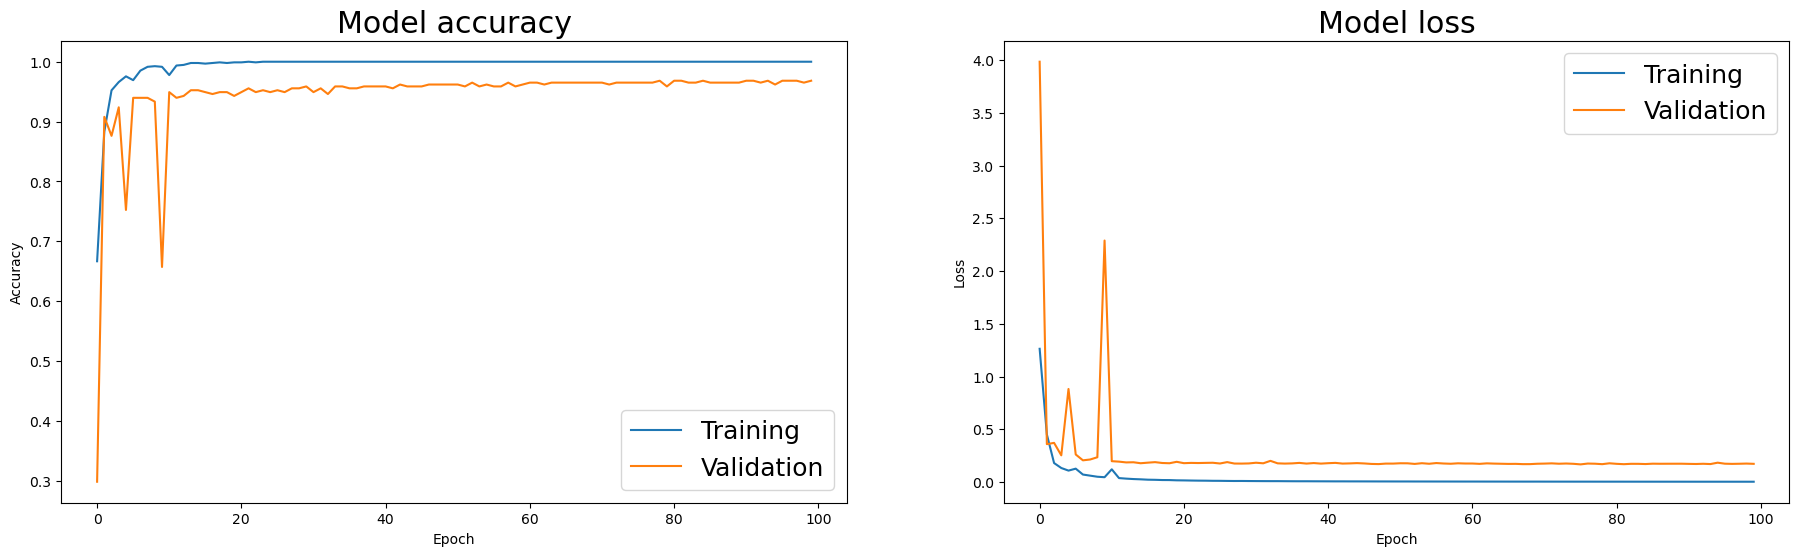

In [53]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(history.history['accuracy'], label = 'Training')
ax[0].plot(history.history['val_accuracy'], label = 'Validation')
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

In [55]:
def show_digit():
    id = np.random.randint(len(predictions))
    XTest = X_test[id].reshape(8, 8)
    plt.figure(figsize = (2, 2))
    plt.imshow(XTest, cmap = 'gray')
    plt.title('Prediction: %d' % predictions[id])
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [57]:
def show_10_digits():
    fig, ax = plt.subplots(2, 5, figsize = (8, 4))
    fig.subplots_adjust(left = 0.02, right = 0.98, top = 0.8, wspace = 0.2, hspace = 0.3)
    fig.suptitle('Ten Predictions', fontsize = 12, fontweight = 'bold')

    plt.rcParams.update({'font.size': 10})

    ids = np.random.randint(len(predictions), size = 10)
    r = 0
    c = 0
    for id in ids:
        XTest = X_test[id].reshape(8, 8)

        # original image
        ax[r, c].imshow(XTest, cmap = 'gray')
        ax[r, c].set_title('Prediction: %d' % predictions[id])
        ax[r, c].set_xticks([])
        ax[r, c].set_yticks([])
        c += 1
        if c > 4:
            r += 1
            c = 0

    plt.show()

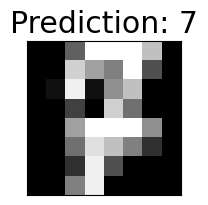

In [59]:
# show one
show_digit()

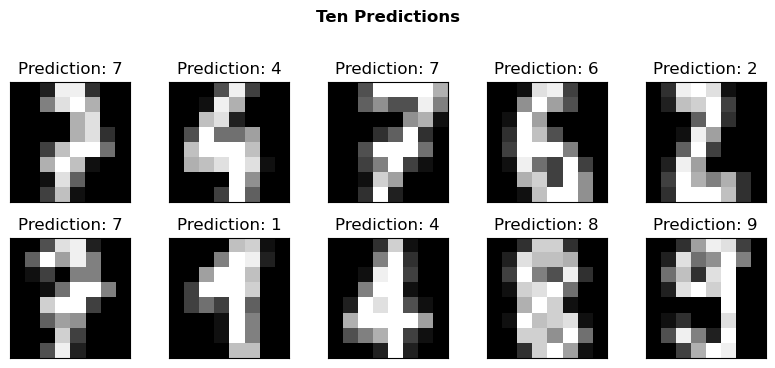

In [61]:
# show ten
show_10_digits()



---



---



> > > > > > > > > © 2024 Institute of Data


---



---